In [15]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import os.path as path
import itertools
from sklearn.model_selection import train_test_split

In [16]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Input,InputLayer, Dense, Activation, BatchNormalization, Flatten, Conv2D
from tensorflow.keras.layers import MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler, \
                                        EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical, multi_gpu_model

In [17]:
os.environ['CUDA_VISIBLE_DEVICES'] = '6'

In [18]:
data_dir = 'data/'

In [19]:
train_data = np.load(path.join(data_dir, 'imagenet_6_class_train_data.npz'))
val_data = np.load(path.join(data_dir, 'imagenet_6_class_val_data.npz'))
test_data = np.load(path.join(data_dir, 'imagenet_6_class_val_data.npz'))

In [6]:
_, x_train, _, y_train = train_test_split(train_data['x_data'], train_data['y_data'], 
                                    test_size=0.30, stratify=train_data['y_data'])
_, x_val, _, y_val = train_test_split(val_data['x_data'], val_data['y_data'], 
                                    test_size=0.30, stratify=val_data['y_data'])
_, x_test, _, y_test = train_test_split(test_data['x_data'], test_data['y_data'], 
                                    test_size=0.30, stratify=test_data['y_data'])
y_table_array = test_data['y_table_array']

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape, y_table_array.shape

((1404, 341, 341, 3),
 (1404,),
 (468, 341, 341, 3),
 (468,),
 (468, 341, 341, 3),
 (468,),
 (6, 2))

In [7]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((1404, 341, 341, 3),
 (1404, 6),
 (468, 341, 341, 3),
 (468, 6),
 (468, 341, 341, 3),
 (468, 6))

In [8]:
y_list = [text for _, text in y_table_array]
y_list

['bed', 'bird', 'cat', 'dog', 'house', 'tree']

In [9]:
input_shape = x_train[0].shape
output_size = len(y_list)

In [10]:
def build_2d_cnn_custom_ch_32_DO(conv_num=1):
    input_layer = Input(shape=input_shape)
    x = input_layer

    for i in range(conv_num):
        x = Conv2D(kernel_size=5, filters=32*(2**(i//2)), strides=(1,1), padding='same')(x)
#         x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = MaxPooling2D(pool_size=3, strides=(3,3), padding='same')(x)

    x = Flatten()(x)
  
    x = Dropout(0.5)(x)
    output_layer = Dense(output_size, activation='softmax')(x)
    
    model = Model(inputs=input_layer, outputs=output_layer)
    
    return model

In [11]:
for i in range(1, 6):
    model = build_2d_cnn_custom_ch_32_DO(conv_num=i)
    model.summary()
    del model

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 341, 341, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 341, 341, 32)      2432      
_________________________________________________________________
activation (Activation)      (None, 341, 341, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 114, 114, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 415872)            0         
_________________________________________________________________
dropout (Dropout)    

Train on 1404 samples, validate on 468 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
1344/1404 [===========================>..] - ETA: 0s - loss: 1.7861 - acc: 0.1979
Epoch 00001: val_loss improved from inf to 1.76561, saving model to model/checkpoint/for_report_vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_050_DO_4_conv_checkpoint/001-1.7656.hdf5
1404/1404 [==============================] - 7s 5ms/sample - loss: 1.7858 - acc: 0.2009 - val_loss: 1.7656 - val_acc: 0.2906
Epoch 2/500
1344/1404 [===========================>..] - ETA: 0s - loss: 1.7623 - acc: 0.2560
Epoch 00002: val_loss improved from 1.76561 to 1.74192, saving model to model/checkpoint/for_report_vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_050_DO_4_conv_checkpoint/002-1.7419.hdf5
1404/1404 [==============================] - 5s 4ms/sample - loss: 1.7618 - acc: 0.2543 - val_loss: 1.7419 - val_acc: 0.3483
Epoch 3/500
1344/1404 [===========================>..] - ETA: 0s - loss: 1.7388 - acc: 0.2850
Epoch 0

Epoch 22/500
1344/1404 [===========================>..] - ETA: 0s - loss: 0.9094 - acc: 0.6771
Epoch 00022: val_loss improved from 0.90101 to 0.88965, saving model to model/checkpoint/for_report_vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_050_DO_4_conv_checkpoint/022-0.8896.hdf5
1404/1404 [==============================] - 5s 4ms/sample - loss: 0.9198 - acc: 0.6688 - val_loss: 0.8896 - val_acc: 0.6645
Epoch 23/500
1344/1404 [===========================>..] - ETA: 0s - loss: 0.9481 - acc: 0.6488
Epoch 00023: val_loss did not improve from 0.88965
1404/1404 [==============================] - 5s 4ms/sample - loss: 0.9458 - acc: 0.6510 - val_loss: 0.9700 - val_acc: 0.6389
Epoch 24/500
1344/1404 [===========================>..] - ETA: 0s - loss: 0.9070 - acc: 0.6652
Epoch 00024: val_loss did not improve from 0.88965
1404/1404 [==============================] - 5s 4ms/sample - loss: 0.9090 - acc: 0.6667 - val_loss: 0.9113 - val_acc: 0.6603
Epoch 25/500
1344/1404 [===========================>.

Epoch 47/500
1344/1404 [===========================>..] - ETA: 0s - loss: 0.6214 - acc: 0.7872
Epoch 00047: val_loss did not improve from 0.74393
1404/1404 [==============================] - 5s 4ms/sample - loss: 0.6188 - acc: 0.7870 - val_loss: 0.7801 - val_acc: 0.6816
Epoch 48/500
1344/1404 [===========================>..] - ETA: 0s - loss: 0.5963 - acc: 0.7909
Epoch 00048: val_loss did not improve from 0.74393
1404/1404 [==============================] - 5s 4ms/sample - loss: 0.5968 - acc: 0.7906 - val_loss: 0.7685 - val_acc: 0.7179
Epoch 49/500
1344/1404 [===========================>..] - ETA: 0s - loss: 0.5681 - acc: 0.8080
Epoch 00049: val_loss did not improve from 0.74393
1404/1404 [==============================] - 5s 4ms/sample - loss: 0.5781 - acc: 0.8070 - val_loss: 0.7751 - val_acc: 0.7073
Epoch 50/500
1344/1404 [===========================>..] - ETA: 0s - loss: 0.5583 - acc: 0.8006
Epoch 00050: val_loss improved from 0.74393 to 0.72804, saving model to model/checkpoint/for

1344/1404 [===========================>..] - ETA: 0s - loss: 0.3574 - acc: 0.8869
Epoch 00075: val_loss did not improve from 0.71051
1404/1404 [==============================] - 5s 4ms/sample - loss: 0.3567 - acc: 0.8868 - val_loss: 0.7134 - val_acc: 0.7393
Epoch 76/500
1344/1404 [===========================>..] - ETA: 0s - loss: 0.3571 - acc: 0.8757
Epoch 00076: val_loss did not improve from 0.71051
1404/1404 [==============================] - 5s 4ms/sample - loss: 0.3544 - acc: 0.8775 - val_loss: 0.7332 - val_acc: 0.7585
Epoch 77/500
1344/1404 [===========================>..] - ETA: 0s - loss: 0.3581 - acc: 0.8787
Epoch 00077: val_loss did not improve from 0.71051
1404/1404 [==============================] - 5s 4ms/sample - loss: 0.3573 - acc: 0.8775 - val_loss: 0.7390 - val_acc: 0.7393
Epoch 78/500
1344/1404 [===========================>..] - ETA: 0s - loss: 0.3337 - acc: 0.8772
Epoch 00078: val_loss improved from 0.71051 to 0.70983, saving model to model/checkpoint/for_report_vis_i

Epoch 105/500
1344/1404 [===========================>..] - ETA: 0s - loss: 0.2001 - acc: 0.9375
Epoch 00105: val_loss did not improve from 0.70983
1404/1404 [==============================] - 5s 4ms/sample - loss: 0.2042 - acc: 0.9345 - val_loss: 0.7714 - val_acc: 0.7415
Epoch 106/500
1344/1404 [===========================>..] - ETA: 0s - loss: 0.1932 - acc: 0.9412
Epoch 00106: val_loss did not improve from 0.70983
1404/1404 [==============================] - 5s 4ms/sample - loss: 0.1927 - acc: 0.9416 - val_loss: 0.7348 - val_acc: 0.7543
Epoch 107/500
1344/1404 [===========================>..] - ETA: 0s - loss: 0.1740 - acc: 0.9420
Epoch 00107: val_loss did not improve from 0.70983
1404/1404 [==============================] - 5s 4ms/sample - loss: 0.1739 - acc: 0.9423 - val_loss: 0.7566 - val_acc: 0.7479
Epoch 108/500
1344/1404 [===========================>..] - ETA: 0s - loss: 0.2021 - acc: 0.9278
Epoch 00108: val_loss did not improve from 0.70983
1404/1404 [==========================

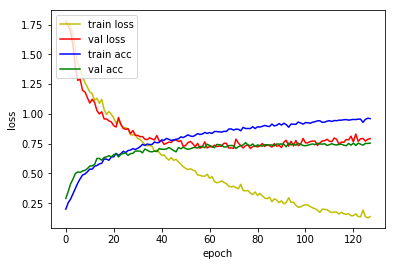

468/468 [==============================] - 1s 2ms/sample - loss: 1.0135 - acc: 0.6218
Loss: 1.0134698937081883 Accuracy: 0.6217949



In [12]:
for i in range(4, 5):
    base = 'for_report_vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_050_DO'
    model_name = base+'_{}_conv'.format(i)
    model = build_2d_cnn_custom_ch_32_DO(conv_num=i)
#     model = multi_gpu_model(model, gpus=2)
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4),
          metrics=['accuracy'])
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    os.makedirs(model_path, exist_ok=True)
    model_filename = model_path+'{epoch:03d}-{val_loss:.4f}.hdf5'
    checkpointer = ModelCheckpoint(filepath = model_filename, monitor = "val_loss", 
                                   verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=50)
    hist = model.fit(x_train, y_train, batch_size=64, epochs=500, 
                     validation_data=[x_val, y_val], shuffle=True, 
                     callbacks = [checkpointer, early_stopping])

    print()
    print(model_name, 'Model')
    fig, ax = plt.subplots()
    ax.plot(hist.history['loss'], 'y', label='train loss')
    ax.plot(hist.history['val_loss'], 'r', label='val loss')
    ax.plot(hist.history['acc'], 'b', label='train acc')
    ax.plot(hist.history['val_acc'], 'g', label='val acc')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    ax.legend(loc='upper left')
    plt.show()

    png_path = 'visualization/learning_curve/'
    filename = model_name+'.png'
    os.makedirs(png_path, exist_ok=True)
    fig.savefig(png_path+filename, transparent=True)

    model.save(model_path+'000_last.hdf5')
    del(model)

    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + sorted(os.listdir(model_path))[-1]
    model = load_model(model_filename)
    [loss, accuracy] = model.evaluate(x_test, y_test)
    print('Loss:', loss, 'Accuracy:', accuracy)
    print()

    del(model)

In [13]:
log_dir = 'log'
os.makedirs(log_dir, exist_ok=True)
base = 'for_report_vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_050_DO'

with open(path.join(log_dir, base), 'w') as log_file:
    for i in range(4, 5):
        model_name = base+'_{}_conv'.format(i)
        print()
        print(model_name, 'Model')
        model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
        model_filename = model_path + sorted(os.listdir(model_path))[-1]

        model = load_model(model_filename)
        model.summary()

        [loss, accuracy] = model.evaluate(x_test, y_test)
        print('Loss:', loss, 'Accuracy:', accuracy)

        del(model)

        log_file.write('\t'.join([model_name, str(accuracy), str(loss)])+'\n')


for_report_vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_050_DO_4_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 341, 341, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 341, 341, 32)      2432      
_________________________________________________________________
activation_15 (Activation)   (None, 341, 341, 32)      0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 114, 114, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 114, 114, 32)      25632     
_________________________________________________________________
activation_16 (Activation)   (None, 114, 114, 32)      0         
_________________________________________________________________


In [14]:
for i in range(4, 5):
    model_name = base+'_{}_conv'.format(i)
    print()
    print(model_name, 'Model')
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + '000_last.hdf5'

    model = load_model(model_filename)
    model.summary()

    [loss, accuracy] = model.evaluate(x_test, y_test)
    print('Loss:', loss, 'Accuracy:', accuracy)

    del(model)


for_report_vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_050_DO_4_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 341, 341, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 341, 341, 32)      2432      
_________________________________________________________________
activation_15 (Activation)   (None, 341, 341, 32)      0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 114, 114, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 114, 114, 32)      25632     
_________________________________________________________________
activation_16 (Activation)   (None, 114, 114, 32)      0         
_________________________________________________________________


In [20]:
base = 'for_report_vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_050_DO'
i=4
model_name = base+'_{}_conv'.format(i)
print()
print(model_name, 'Model')
model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
model_filename = model_path + sorted(os.listdir(model_path))[-1]

model = load_model(model_filename)
model.summary()

[loss, accuracy] = model.evaluate(x_test, y_test)
print('Loss:', loss, 'Accuracy:', accuracy)

# del(model)


for_report_vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_050_DO_4_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 341, 341, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 341, 341, 32)      2432      
_________________________________________________________________
activation_15 (Activation)   (None, 341, 341, 32)      0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 114, 114, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 114, 114, 32)      25632     
_________________________________________________________________
activation_16 (Activation)   (None, 114, 114, 32)      0         
_________________________________________________________________


In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
y_list

['bed', 'bird', 'cat', 'dog', 'house', 'tree']

Confusion Matrix
[[53  6  8 11  0  0]
 [11 41 10  7  3  6]
 [12  7 34 18  1  6]
 [ 6 11 18 38  0  5]
 [ 3  2  4  1 61  7]
 [ 0  3  4  2  5 64]]

Classification Report
              precision    recall  f1-score   support

           0       0.62      0.68      0.65        78
           1       0.59      0.53      0.55        78
           2       0.44      0.44      0.44        78
           3       0.49      0.49      0.49        78
           4       0.87      0.78      0.82        78
           5       0.73      0.82      0.77        78

   micro avg       0.62      0.62      0.62       468
   macro avg       0.62      0.62      0.62       468
weighted avg       0.62      0.62      0.62       468




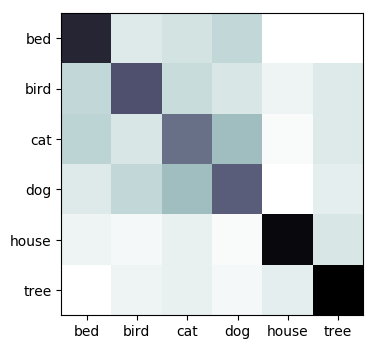

In [25]:
Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)
y_real = np.argmax(y_test, axis=1)
confusion_mat = confusion_matrix(y_real, y_pred)
print('Confusion Matrix')
print(confusion_mat)
print()

print('Classification Report')
print(classification_report(y_real, y_pred))
print()

# labels = y_table.T[0]
plt.figure(figsize=(4,4), dpi=100)
plt.xticks(np.arange(len(y_list)), y_list)
plt.yticks(np.arange(len(y_list)), y_list)
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.bone_r)